In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib
import koh
importlib.reload(koh)
from koh import SelfOrganizingMap as SOM

## MNIST dataset

In [17]:
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test) 

In [18]:
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = ''
training_images_filepath = join(input_path, 'dane_koh/mnist_data/train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'dane_koh/mnist_data/train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 'dane_koh/mnist_data/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 'dane_koh/mnist_data/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')


Train size: (60000, 784)
Test size: (10000, 784)


C:\Users\barte\AppData\Local\Temp\ipykernel_31436\3623322440.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', 10)


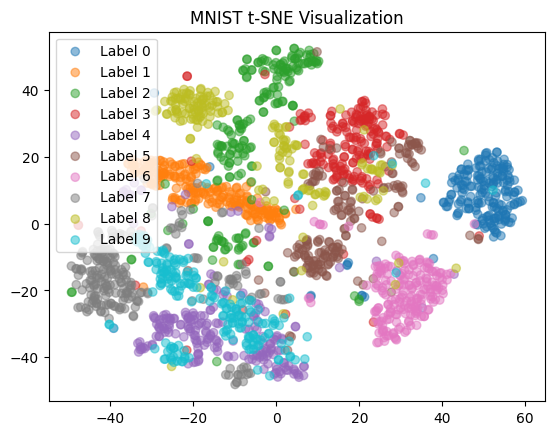

In [19]:
from sklearn.manifold import TSNE

mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

X_train = np.array(x_train)
X_test = np.array(x_test)
Y_train = np.array(y_train)
Y_test = np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

print(f"Train size: {X_train.shape}")
print(f"Test size: {X_test.shape}")

# Use t-SNE to reduce dimensions
model = TSNE(n_components=2, random_state=123)
tsne_data = model.fit_transform(X_train[:2000])  
tsne_data = np.vstack((tsne_data.T, Y_train[:2000].T)).T


colors = plt.cm.get_cmap('tab10', 10) 


for label in np.unique(Y_train[:2000]):
    filtered = tsne_data[tsne_data[:,2] == label]
    plt.scatter(filtered[:,0], filtered[:,1], c=np.array([colors(label)] * len(filtered)), alpha=0.5, label=f'Label {label}')

plt.title("MNIST t-SNE Visualization")
plt.legend()
plt.show()


In [ ]:
# from sklearn.metrics import silhouette_score
# from sklearn.cluster import AgglomerativeClustering

# best_score = -1
# best_n_clusters = 0

# for n_clusters in range(2, 11):  
#     model = AgglomerativeClustering(n_clusters=n_clusters)
#     model.fit(X)  
#     score = silhouette_score(X, model.labels_)
        
#     if score > best_score:
#         best_score = score
#         best_n_clusters = n_clusters

# print(f"Najlepsza liczba klastrów: {best_n_clusters} z Silhouette Score: {best_score}")